# 라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('../data/1st_train_mdf.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## EDA
1. 범주형 데이터 분석
2. 수치형 데이터 분석

In [5]:
objects = df.select_dtypes(include=['object']).columns
ints = df.select_dtypes(include=['int']).columns
floats = df.select_dtypes(include=['float']).columns

print(f"Str dtypes: {len(objects)}개")
print(f"Int dtypes: {len(ints)}개")
print(f"Float dtypes: {len(floats)}개")

Str dtypes: 43개
Int dtypes: 35개
Float dtypes: 3개


In [6]:
# NaN 값이 있는 컬럼 확인
df_nan = df[df.columns[df.isnull().any()]]
# NaN 값이 없는 컬럼 확인
df_not_nan = df[df.columns[~df.isnull().any()]]

print(f"NaN Columns: {df_nan.shape[1]}")
print(f"NOT NaN Columns: {df_not_nan.shape[1]}")

NaN Columns: 19
NOT NaN Columns: 62


### 1. 범주형 데이터 분석

In [4]:
objects_df = df[objects]
objects_df

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


고유값 평균: 5.84


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_16958/2616507446.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Column', y='Unique Count', data=unique_df, palette='viridis')


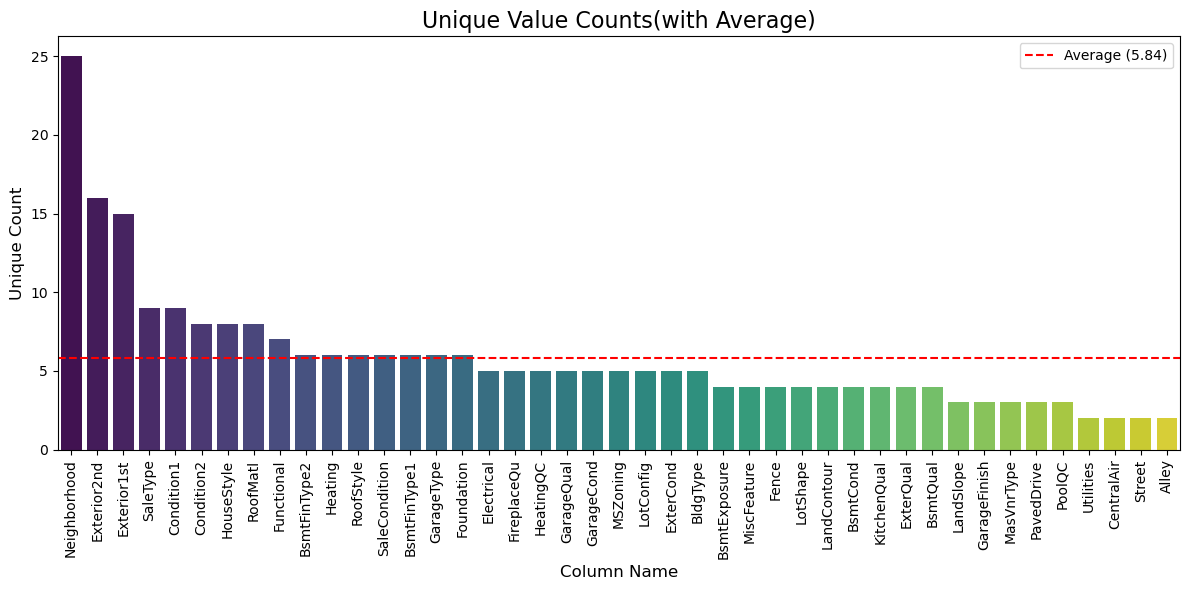

In [7]:
# 각 컬럼별 고유값 개수 계산
unique_counts = []
columns = objects_df.columns

for col in columns:
    unique_cnt = objects_df[col].nunique()
    unique_counts.append(unique_cnt)

# 고유값 개수의 평균 계산
mean_unique_col = round(sum(unique_counts) / len(unique_counts), 2)
print(f"고유값 평균: {mean_unique_col}")

# 시각화 데이터프레임 생성
unique_df = pd.DataFrame({
    'Column': columns,
    'Unique Count': unique_counts}).sort_values(by=['Unique Count'], ascending=False).reset_index(drop=True) # 고유값 개수 기준 내림차순

# 그래프 설정 및 그리기
plt.figure(figsize=(12, 6))
sns.barplot(x='Column', y='Unique Count', data=unique_df, palette='viridis')
plt.axhline(mean_unique_col, color='red', linestyle='--', label=f'Average ({mean_unique_col})') # 평균선을 추가
plt.title('Unique Value Counts(with Average)', fontsize=16)
plt.xticks(rotation=90, fontsize=10)  # X축 컬럼명 회전
plt.ylabel('Unique Count', fontsize=12)
plt.xlabel('Column Name', fontsize=12)
plt.legend()  # 범례 추가
plt.tight_layout()  # 레이아웃 조정
plt.show();

In [8]:
unique_df

,Column,Unique Count
0,Neighborhood,25
1,Exterior2nd,16
2,Exterior1st,15
3,SaleType,9
4,Condition1,9
5,Condition2,8
6,HouseStyle,8
7,RoofMatl,8
8,Functional,7
9,BsmtFinType2,6


/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_16958/3050914852.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Neighborhood', data=objects_df, palette='viridis', ax=axes[0, 0])
/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_16958/3050914852.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90, fontsize=10)
/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_16958/3050914852.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exterior2nd', data=objects_df, palette='viridis', ax=axes[0, 1])
/var/folders/0s/8dffxjb55g767y_3df067w080000gn/T/ipykernel_

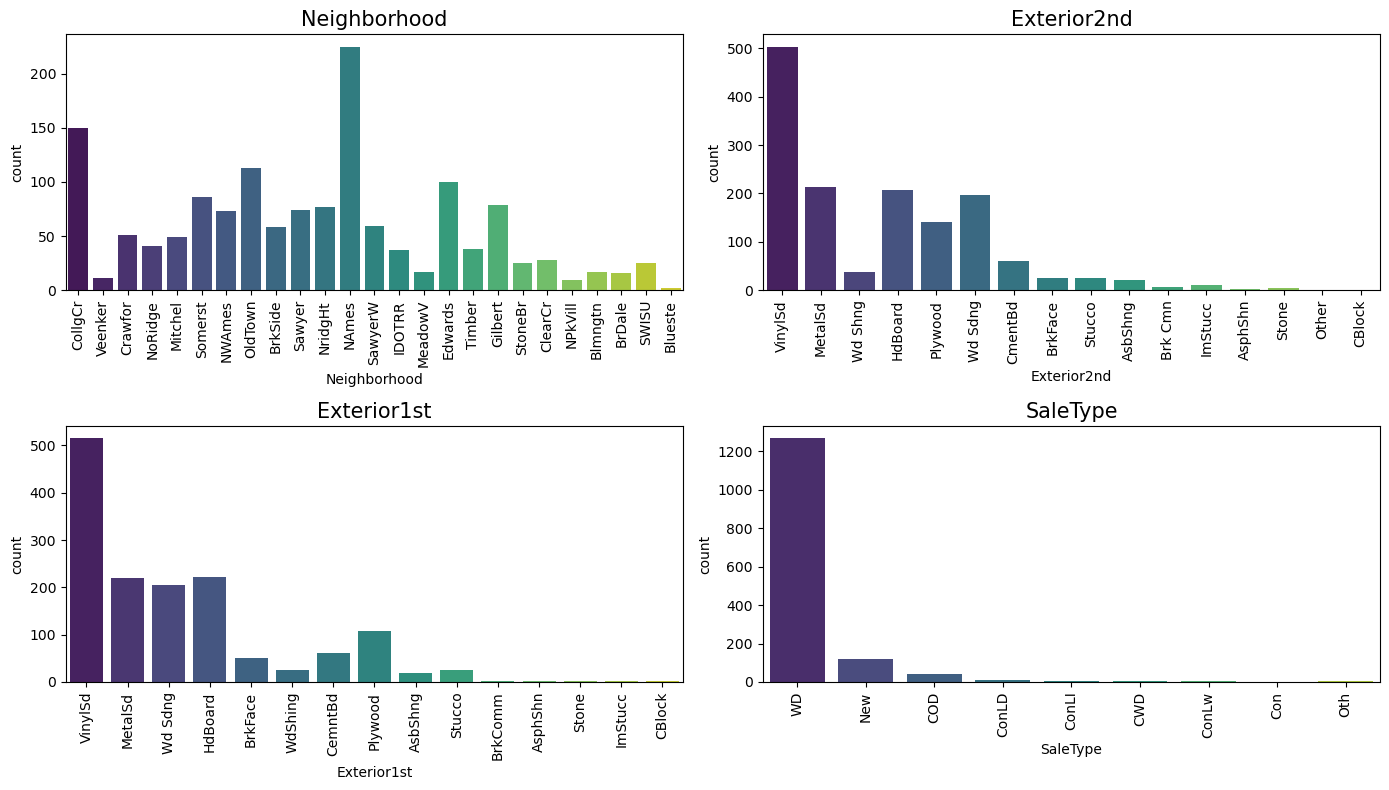

In [9]:
# 상위4 최빈값 분석
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

sns.countplot(x='Neighborhood', data=objects_df, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Neighborhood', fontsize=15)
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90, fontsize=10)

sns.countplot(x='Exterior2nd', data=objects_df, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Exterior2nd', fontsize=15)
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90, fontsize=10)

sns.countplot(x='Exterior1st', data=objects_df, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Exterior1st', fontsize=15)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90, fontsize=10)

sns.countplot(x='SaleType', data=objects_df, palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('SaleType', fontsize=15)
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=90, fontsize=10)

plt.tight_layout()  # 레이아웃 자동 조정
plt.show()

### 2. 수치형 데이터 분석

In [10]:
# 기초 통계 확인
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### 분포 확인

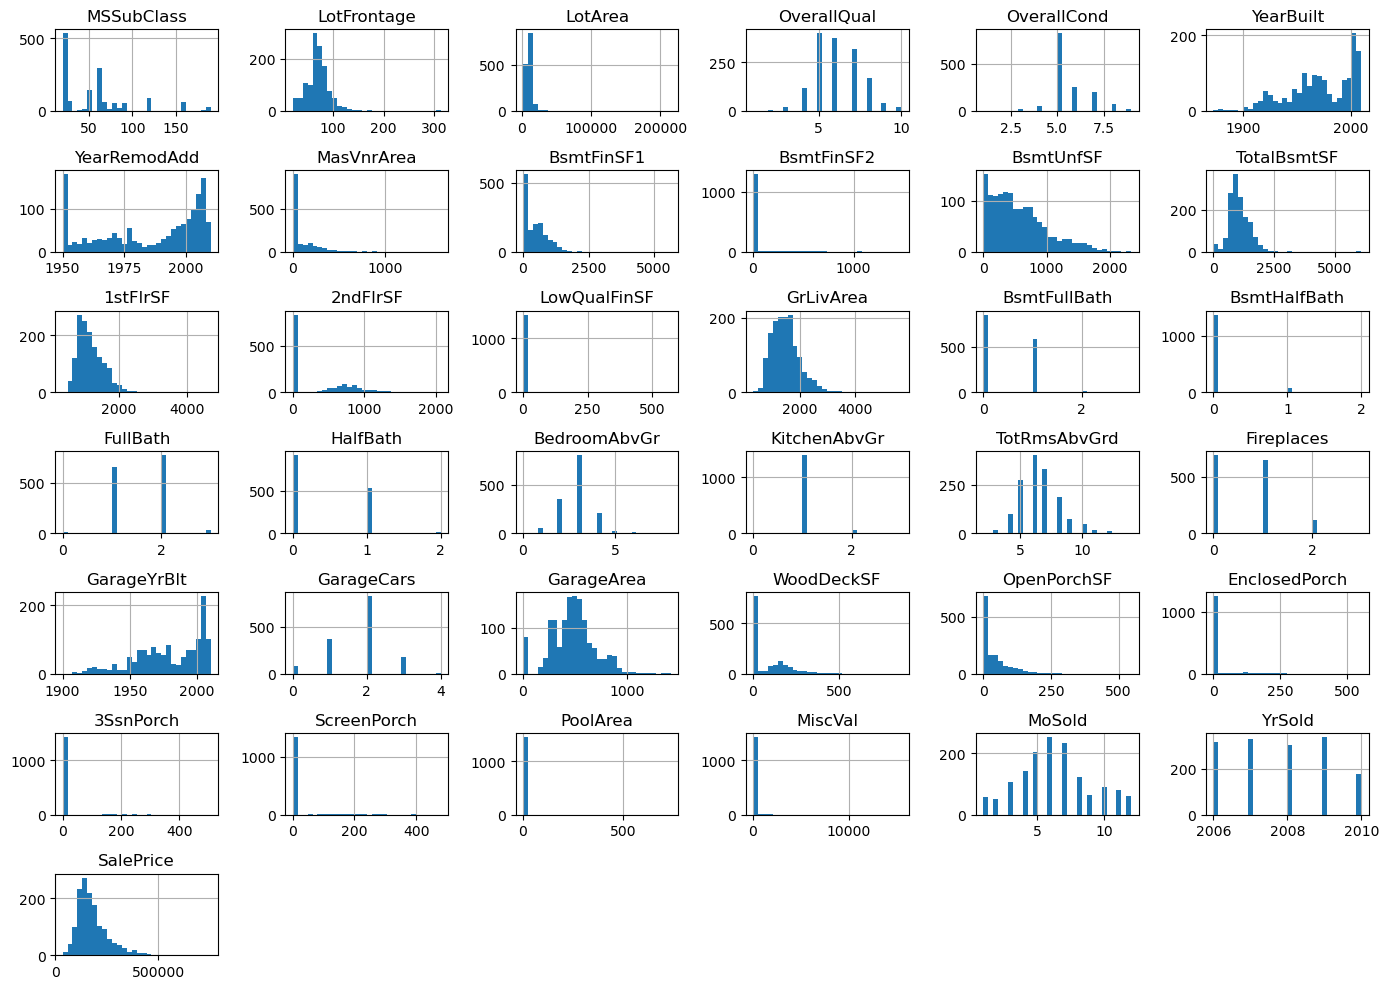

In [ ]:
num_df = df.select_dtypes(include=['float', 'int']).drop(columns=['Id']) # 고유 식별자 Id 컬럼은 제외
num_df.hist(bins=30, figsize=(14, 10)) # 분포 확인
plt.tight_layout()
plt.show()

In [12]:
result = {}
for col in num_df:
    stat, p = shapiro(num_df[col]) # 정규성 검정
    result[col] = '가우시안 분포' if p > 0.05 else '비정규분포' # p-value: 0.05

for col, dist_type in result.items(): # items: 튜플로 반환
    print(f"{col}: {dist_type}")

# 정규뷴포, 비정규분포 개수 확인
normal_count = sum(1 for val in result.values() if val == '가우시안 분포')
non_normal_count = len(result) - normal_count

print(f"\n가우시안 분포 Columns: {normal_count}")
print(f"비정규분포 Columns: {non_normal_count}")

MSSubClass: 비정규분포
LotFrontage: 가우시안 분포
LotArea: 비정규분포
OverallQual: 비정규분포
OverallCond: 비정규분포
YearBuilt: 비정규분포
YearRemodAdd: 비정규분포
MasVnrArea: 가우시안 분포
BsmtFinSF1: 비정규분포
BsmtFinSF2: 비정규분포
BsmtUnfSF: 비정규분포
TotalBsmtSF: 비정규분포
1stFlrSF: 비정규분포
2ndFlrSF: 비정규분포
LowQualFinSF: 비정규분포
GrLivArea: 비정규분포
BsmtFullBath: 비정규분포
BsmtHalfBath: 비정규분포
FullBath: 비정규분포
HalfBath: 비정규분포
BedroomAbvGr: 비정규분포
KitchenAbvGr: 비정규분포
TotRmsAbvGrd: 비정규분포
Fireplaces: 비정규분포
GarageYrBlt: 가우시안 분포
GarageCars: 비정규분포
GarageArea: 비정규분포
WoodDeckSF: 비정규분포
OpenPorchSF: 비정규분포
EnclosedPorch: 비정규분포
3SsnPorch: 비정규분포
ScreenPorch: 비정규분포
PoolArea: 비정규분포
MiscVal: 비정규분포
MoSold: 비정규분포
YrSold: 비정규분포
SalePrice: 비정규분포

가우시안 분포 Columns: 3
비정규분포 Columns: 34


## 주요 변수 선정
- 위 대략적인 EDA 결과로 선정

In [13]:
feature_important = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'OverallQual',
             'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Neighborhood', 'BsmtQual',
             'BsmtCond', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr',
             'KitchenQual', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'Fireplaces',
             'PavedDrive', 'SalePrice']

df_import = df[feature_important]
df_import

,MSSubClass,MSZoning,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Neighborhood,BsmtQual,...,GrLivArea,FullBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageCars,GarageArea,Fireplaces,PavedDrive,SalePrice
0,60,RL,65.0,8450,7,5,2003,2003,CollgCr,Gd,...,1710,2,3,Gd,8,2,548,0,Y,208500
1,20,RL,80.0,9600,6,8,1976,1976,Veenker,Gd,...,1262,2,3,TA,6,2,460,1,Y,181500
2,60,RL,68.0,11250,7,5,2001,2002,CollgCr,Gd,...,1786,2,3,Gd,6,2,608,1,Y,223500
3,70,RL,60.0,9550,7,5,1915,1970,Crawfor,TA,...,1717,1,3,Gd,7,3,642,1,Y,140000
4,60,RL,84.0,14260,8,5,2000,2000,NoRidge,Gd,...,2198,2,4,Gd,9,3,836,1,Y,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,6,5,1999,2000,Gilbert,Gd,...,1647,2,3,TA,7,2,460,1,Y,175000
1456,20,RL,85.0,13175,6,6,1978,1988,NWAmes,Gd,...,2073,2,3,TA,7,2,500,2,Y,210000
1457,70,RL,66.0,9042,7,9,1941,2006,Crawfor,TA,...,2340,2,4,Gd,9,1,252,2,Y,266500
1458,20,RL,68.0,9717,5,6,1950,1996,NAmes,TA,...,1078,1,2,Gd,5,1,240,0,Y,142125


In [14]:
df_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   MSZoning      1460 non-null   object 
 2   LotFrontage   1201 non-null   float64
 3   LotArea       1460 non-null   int64  
 4   OverallQual   1460 non-null   int64  
 5   OverallCond   1460 non-null   int64  
 6   YearBuilt     1460 non-null   int64  
 7   YearRemodAdd  1460 non-null   int64  
 8   Neighborhood  1460 non-null   object 
 9   BsmtQual      1423 non-null   object 
 10  BsmtCond      1423 non-null   object 
 11  TotalBsmtSF   1460 non-null   int64  
 12  GrLivArea     1460 non-null   int64  
 13  FullBath      1460 non-null   int64  
 14  BedroomAbvGr  1460 non-null   int64  
 15  KitchenQual   1460 non-null   object 
 16  TotRmsAbvGrd  1460 non-null   int64  
 17  GarageCars    1460 non-null   int64  
 18  GarageArea    1460 non-null 

#### 상관관계 확인

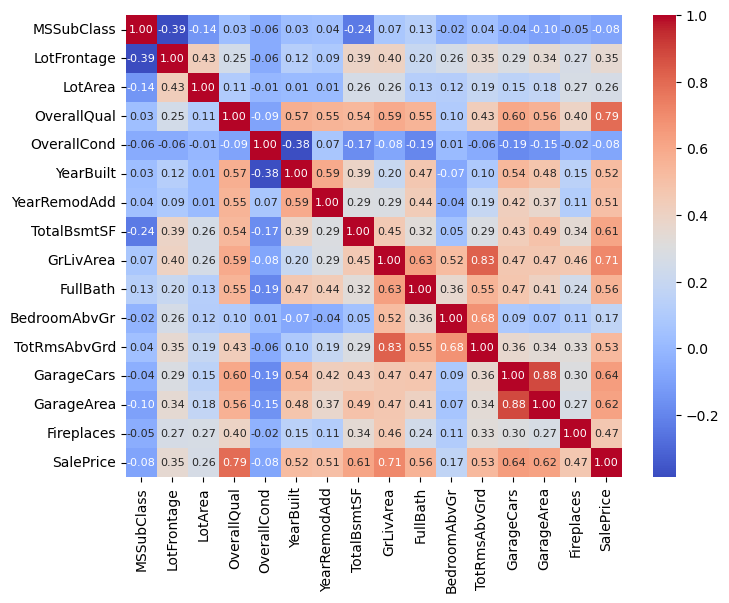

In [15]:
# 상관관계 확인
num_df = df_import.select_dtypes(include=['number'])
plt.figure(figsize=(8, 6))
sns.heatmap(num_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 8})
plt.show()

#### 선형 관계 시각화

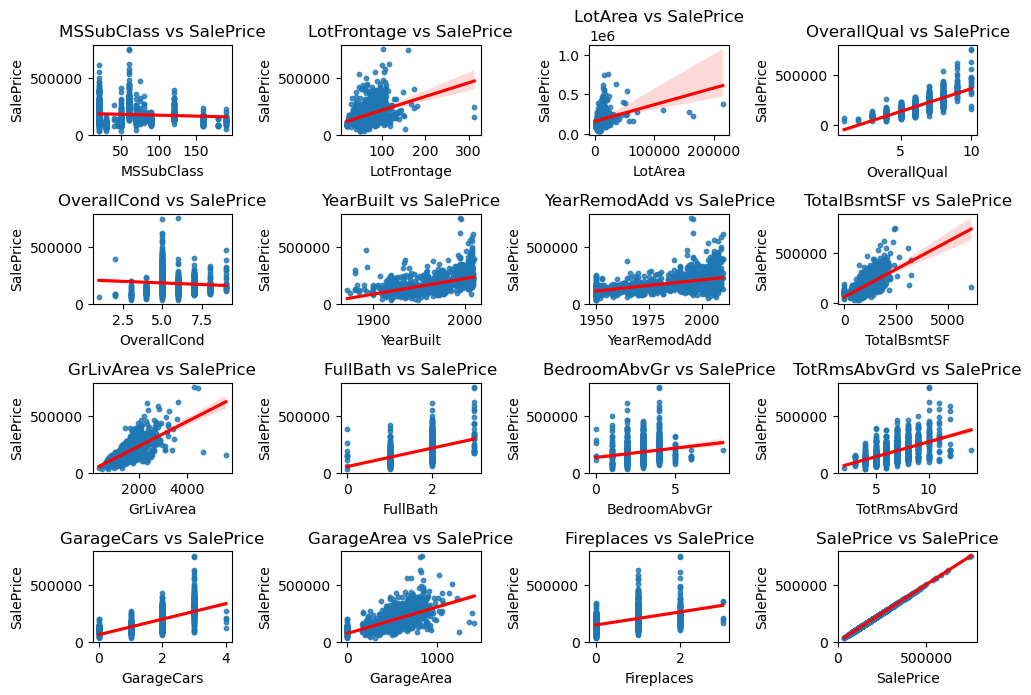

In [16]:
plt.figure(figsize=(10, 10))
for i, col in enumerate(num_df.columns):
    plt.subplot(6, 4, i+1) 
    sns.regplot(x=num_df[col], y=num_df['SalePrice'], scatter_kws={'s': 10}, line_kws={'color': 'red'})  # SalePrice와 비교
    plt.title(f'{col} vs SalePrice')
    plt.tight_layout()

plt.show()

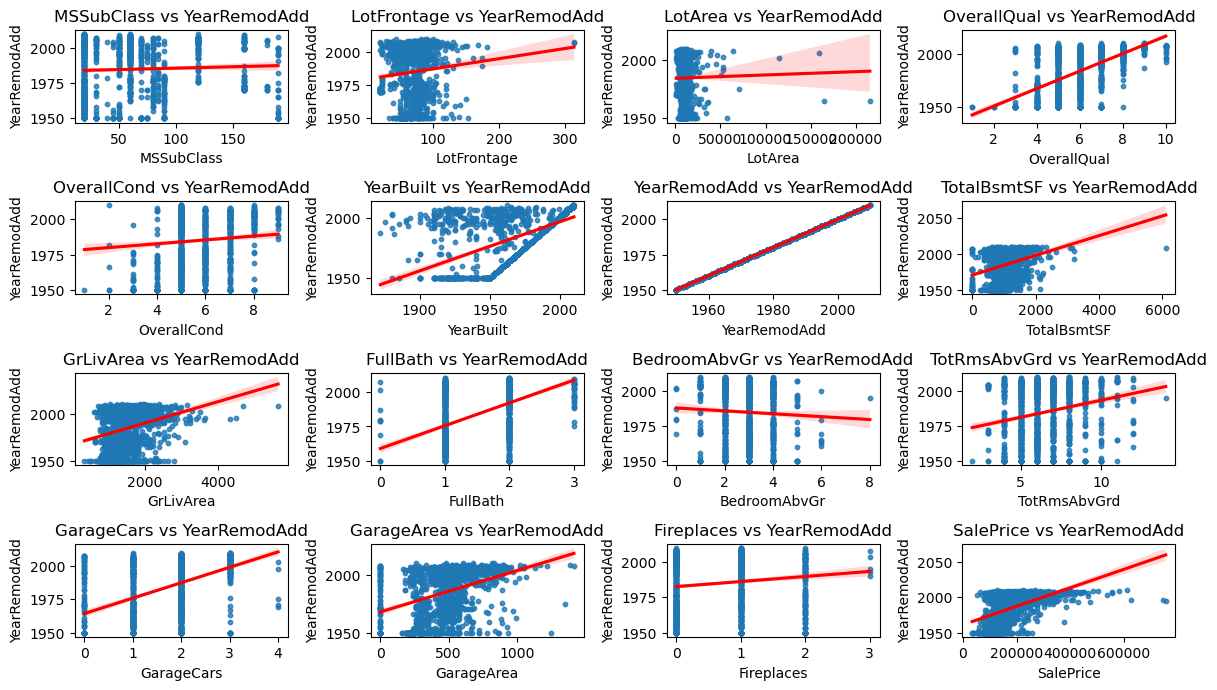

In [17]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(num_df.columns):
    plt.subplot(6, 4, i+1) 
    sns.regplot(x=num_df[col], y=num_df['YearRemodAdd'], scatter_kws={'s': 10}, line_kws={'color': 'red'})  # YearRemodAdd와 비교
    plt.title(f'{col} vs YearRemodAdd')
    plt.tight_layout()

plt.show()